In [1]:
import ast

import pandas as pd
from nltk import sent_tokenize
from tqdm import tqdm

from utils.utils import get_node_recall, plot_scores, PNode

tqdm.pandas()

pd.set_option("display.width", 5000)

val_sovanta = pd.read_csv("val-sovanta.csv")
val_wikieval = pd.read_csv("val-wikieval.csv")

# validate_datasets.ipynb

The purpose of this notebook is to validate the datasets, making sure that all labels are correct. The results are discussed in section 3.2.1 of the thesis

We check the recall with the longest context size: chunk size 512 and top 12
## 1. Wikieval Retrieval

In [2]:
val_wikieval["nodes_recall_0.3"] = val_wikieval.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.3), axis=1)
val_wikieval["nodes_recall_0.5"] = val_wikieval.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.5), axis=1)
val_wikieval["nodes_recall_0.9"] = val_wikieval.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.9), axis=1)

100%|██████████| 50/50 [00:00<00:00, 79.13it/s] 


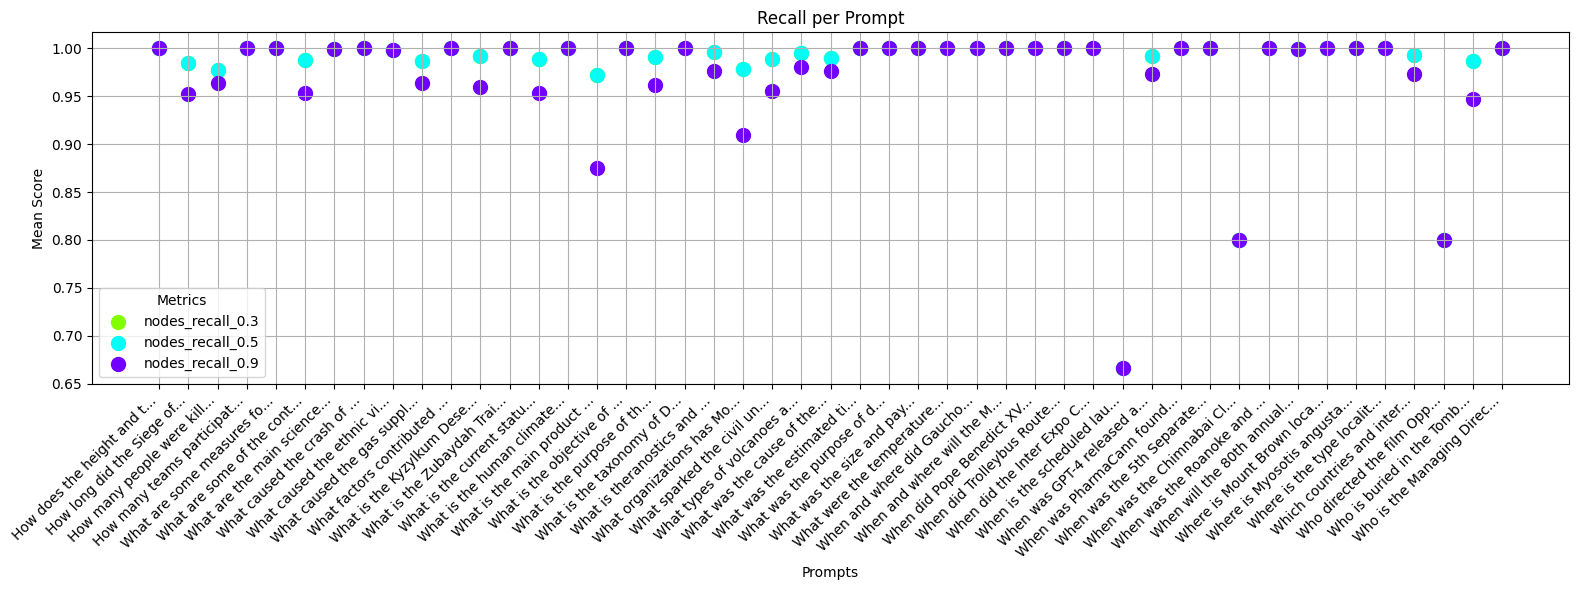

Overall mean values:
nodes_recall_0.3    0.980699
nodes_recall_0.5    0.980699
nodes_recall_0.9    0.969306
dtype: float64


In [3]:
plot_scores(
    val_wikieval,
    group_by="prompt",
    columns_to_plot=["nodes_recall_0.3", "nodes_recall_0.5", "nodes_recall_0.9"],
    title="Recall per Prompt",
    xlabel="Prompts",
)

In [4]:
low_recall_prompts = val_wikieval[val_wikieval["nodes_recall_0.9"] < 0.9]
print(f"Found {len(low_recall_prompts)} prompts with recall < 0.9\n")
print("Top worst performing prompts:")
for prompt in low_recall_prompts.index:
    p = low_recall_prompts.loc[prompt]
    print(f"\nPrompt: {p['prompt']}")
    print(f"Recall: {p['nodes_recall_0.9']}")

Found 4 prompts with recall < 0.9

Top worst performing prompts:

Prompt: When is the scheduled launch date and time for the PSLV-C56 mission, and where will it be launched from?
Recall: 0.6666666666666666

Prompt: Who directed the film Oppenheimer and who stars as J. Robert Oppenheimer in the film?
Recall: 0.8

Prompt: What is the main product of Fremantle Octopus and where is it based?
Recall: 0.875

Prompt: When was the Chimnabai Clock Tower completed, and who was it named after?
Recall: 0.8


- When is the scheduled launch date and time for the PSLV-C56 mission, and where will it be launched from?
--> one chunk will be removed from target because it is not present in the longer context
- Who directed the film Oppenheimer and who stars as J. Robert Oppenheimer in the film?
--> one chunk will be removed from target because it is not present in the longer context
- What is the main product of Fremantle Octopus and where is it based?
--> no mistake, is able to be found
- When was the Chimnabai Clock Tower completed, and who was it named after?
--> two chunks will be removed from target because they are not present in the context


### Now check corrected validation dataset

In [5]:
val_wikieval = pd.read_csv("val-wikieval-v2.csv")
val_wikieval["nodes_recall_0.3"] = val_wikieval.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.3), axis=1)
val_wikieval["nodes_recall_0.5"] = val_wikieval.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.5), axis=1)
val_wikieval["nodes_recall"] = val_wikieval.progress_apply(lambda row: get_node_recall(row, lcs_thresh=1), axis=1)

100%|██████████| 50/50 [00:00<00:00, 199.87it/s]


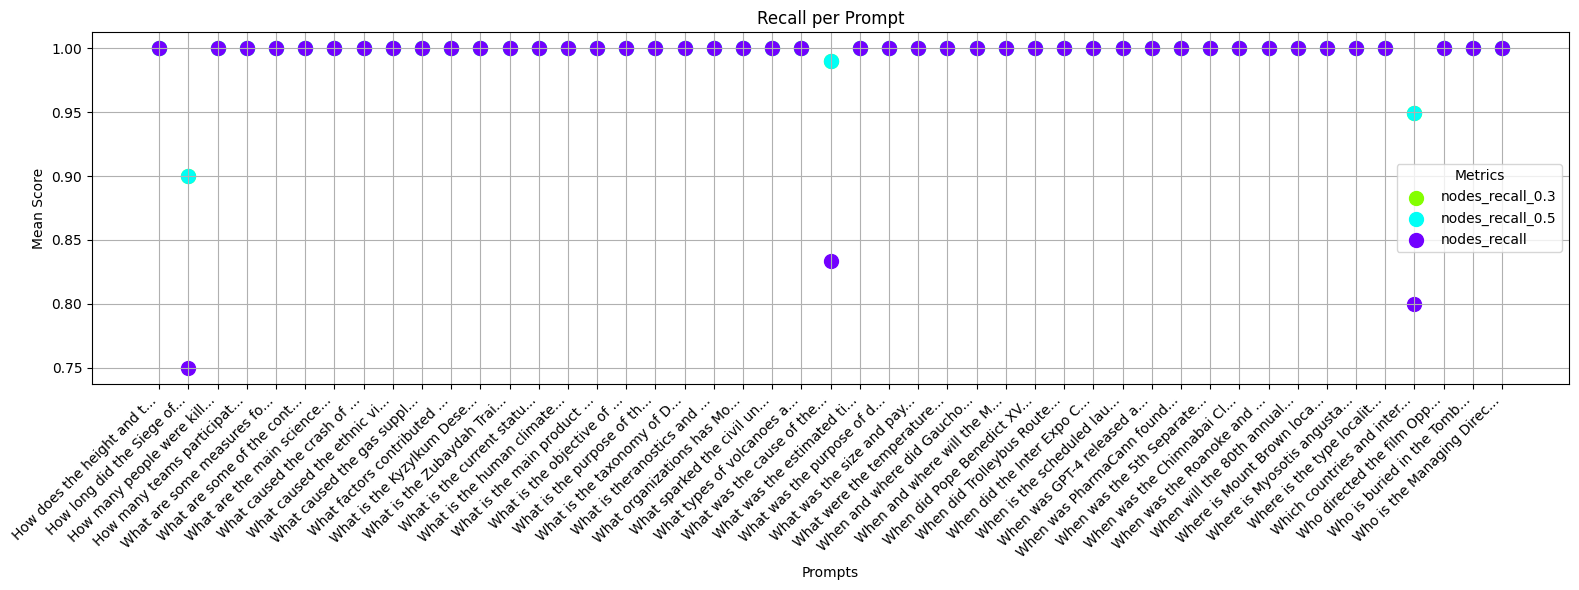

Overall mean values:
nodes_recall_0.3    0.996791
nodes_recall_0.5    0.996791
nodes_recall        0.987667
dtype: float64


In [6]:
plot_scores(
    val_wikieval,
    group_by="prompt",
    columns_to_plot=["nodes_recall_0.3", "nodes_recall_0.5", "nodes_recall"],
    title="Recall per Prompt",
    xlabel="Prompts",
)

## 2. sovanta Retrieval

In [7]:
val_sovanta["nodes_recall_0.3"] = val_sovanta.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.3), axis=1)
val_sovanta["nodes_recall_0.5"] = val_sovanta.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.5), axis=1)
val_sovanta["nodes_recall_0.9"] = val_sovanta.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.9), axis=1)

100%|██████████| 84/84 [00:00<00:00, 162.52it/s]


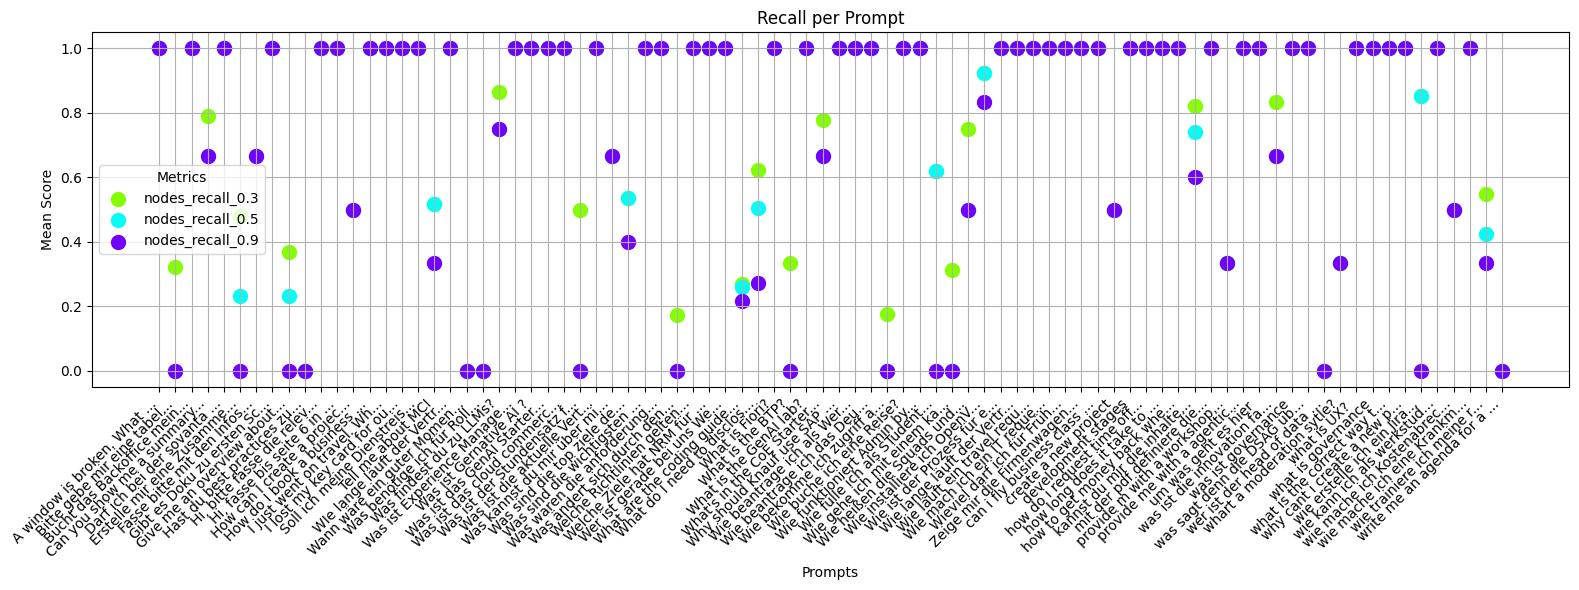

Overall mean values:
nodes_recall_0.3    0.784450
nodes_recall_0.5    0.745179
nodes_recall_0.9    0.711200
dtype: float64


In [8]:
plot_scores(
    val_sovanta,
    group_by="prompt",
    columns_to_plot=["nodes_recall_0.3", "nodes_recall_0.5", "nodes_recall_0.9"],
    title="Recall per Prompt",
    xlabel="Prompts",
)

In [9]:
low_recall_prompts = val_sovanta[val_sovanta["nodes_recall_0.3"] < 0.8]
print(f"Found {len(low_recall_prompts)} prompts with recall < 0.9\n")
print("Top worst performing prompts:")
for prompt in low_recall_prompts.index:
    p = low_recall_prompts.loc[prompt]
    print(f"\nPrompt: {p['prompt']}")
    print(f"Recall: {p['nodes_recall_0.9']}")

Found 29 prompts with recall < 0.9

Top worst performing prompts:

Prompt: wer ist der head of data science?
Recall: 0.0

Prompt: Wie heißen die Squads und wer sind die Leads?
Recall: 0.5

Prompt: Was ist der Stundensatz für einen Monteur für Brandmeldeanlagen?
Recall: 0.0

Prompt: Bitte gebe mir eine tabellarische Übersicht über die Mindestdeckungssummen für die Haftpflichtversicherung
Recall: 0.0

Prompt: Was ändert sich durch den zweiten Nachtrag?
Recall: 0.0

Prompt: Wie fülle ich als STudent meinen Stundenzettel aus?
Recall: 0.0

Prompt: create a new project
Recall: 0.5

Prompt: Wie bekomme ich zugriff auf den ML Server?
Recall: 0.0

Prompt: What is the BTP?
Recall: 0.0

Prompt: Was benötige ich für Rollen beim Roadmap to CoE
Recall: 0.0

Prompt: Wie gehe ich mit einem kaputten Laptop um
Recall: 0.0

Prompt: whart a moderation sytle?
Recall: 0.3333333333333333

Prompt: write me an agenda for a design thinking workshop related to AI Discovery
Recall: 0.0

Prompt: provide m with a w

- wer ist der head of data science? -> hard, changed relevant text slightly
- Wie heißen die Squads und wer sind die Leads? -> fixed target
- Bitte gebe mir eine tabellarische Übersicht über die Mindestdeckungssummen für die Haftpflichtversicherung -> rm
- Was ändert sich durch den zweiten Nachtrag? -> rm
- Wie fülle ich als STudent meinen Stundenzettel aus? -> fixed target
- create a new project -> fixed target
- Wie bekomme ich zugriff auf den ML Server? -> fixed target
- whart a moderation sytle? -> fixed target
- write me an agenda for a design thinking workshop related to AI Discovery -> fixed target
- provide m with a workshop agenda for a GENAI ideation event -> fixed target
- Erstelle mir eine Zusammenafassung des Dokuments -> rm
- wie mache ich Kostenabrechnung? -> fixed target
- How can I create a project -> fixed target

To replace the removed prompts, 8 new data points were added from the productive system


### Now check corrected dataset


In [10]:
val_sovanta = pd.read_csv("val-sovanta-v2.csv")
val_sovanta["nodes_recall_0.3"] = val_sovanta.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.3), axis=1)
val_sovanta["nodes_recall_0.5"] = val_sovanta.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.5), axis=1)
val_sovanta["nodes_recall"] = val_sovanta.progress_apply(lambda row: get_node_recall(row, lcs_thresh=1), axis=1)

100%|██████████| 88/88 [00:00<00:00, 172.32it/s]


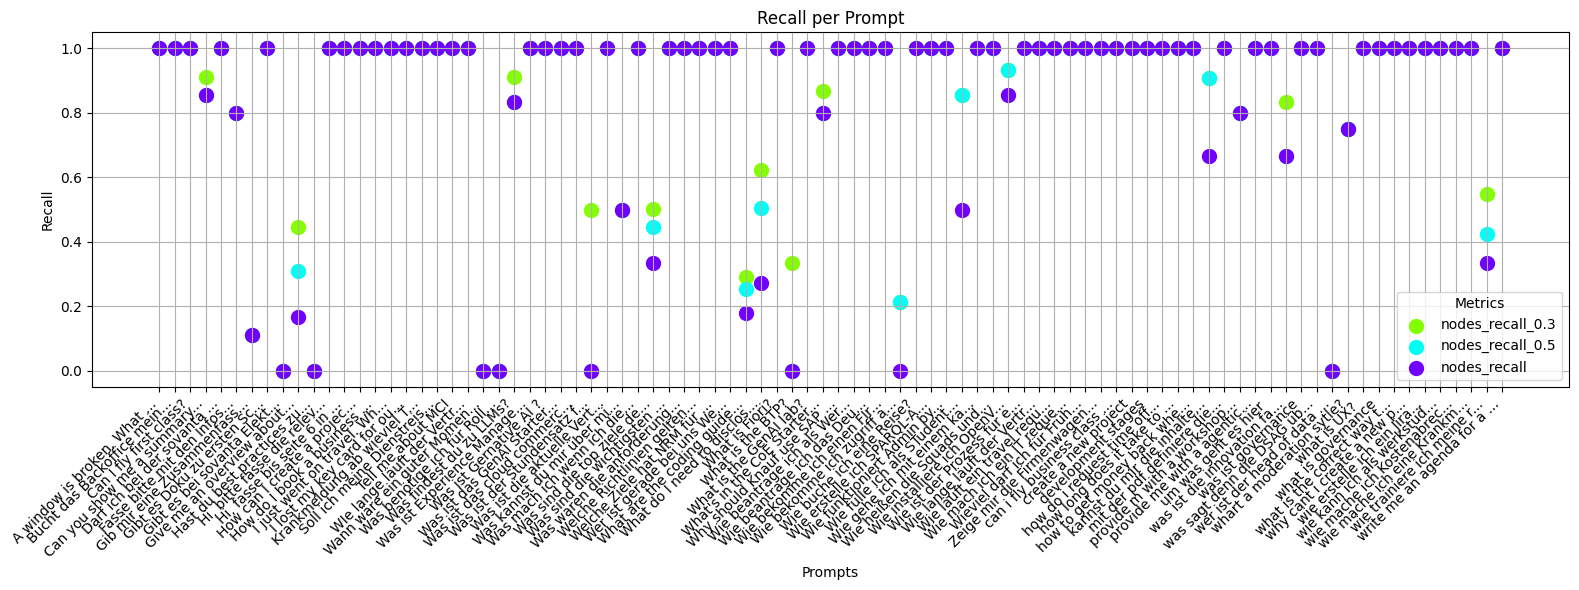

Overall mean values:
nodes_recall_0.3    0.859488
nodes_recall_0.5    0.840565
nodes_recall        0.823025
dtype: float64


In [11]:
plot_scores(
    val_sovanta,
    group_by="prompt",
    columns_to_plot=["nodes_recall_0.3", "nodes_recall_0.5", "nodes_recall"],
    title="Recall per Prompt",
    xlabel="Prompts",
    ylabel="Recall",
)

In [12]:
pr = val_sovanta[val_sovanta["nodes_recall_0.5"] != val_sovanta["nodes_recall"]]
example_case = pr.iloc[0]
t = ast.literal_eval(example_case["relevant_text"].replace("\n", ""))
from utils.utils import get_node_score, cleanup_string

nodes_content = " ".join(
    [
        "\n\n------------\nDocument: " + n.documentName + ":\n" + n.text
        for n in pd.eval(example_case["nodes"], local_dict={"PNode": PNode})
    ]
)
for target in t:
    print(target)
    score = get_node_score(cleanup_string(target), cleanup_string(nodes_content), lcs_thresh=0.3)
    print(f"Score: {score}")

print(nodes_content)

Type URL "https://openvpn.sovanta.com">https://openvpn.sovanta.com" and click NEXT
Score: 0.5396825396825397
3.
Score: 1.0
Click SIGN IN
Score: 1.0
Click CONFIRM
Score: 1.0
In your browser, scroll down and click Sign in via SAML
Score: 1.0
Click Import profile in App
Score: 1.0
Sign in with your sovanta EMail account and password - use the Microsoft Authenticator App with your Smartphone to verify your Account
Score: 1.0


------------
Document: How to setup OpenVPN (with Single Sign On):
![openVPN4.png](https://sovanta.atlassian.net/wiki/download/thumbnails/3242262588/openVPN4.png?version=2&modificationDate=1727176591829&cacheVersion=1&api=v2&width=553&height=579)
5. Sign in with your sovanta EMail account and password - use the Microsoft Authenticator App with your Smartphone to verify your Account

   Melde dich mit deinem sovanta E-Mail Konto und Passwort an - verwende die Microsoft Authenticator App deinem Smartphone, um dein Konto zu verifizieren

   ![OpenVPN5.png](https://sovan

In [13]:
low_recall_prompts = val_sovanta[val_sovanta["nodes_recall_0.5"] < 0.8]
print(f"Found {len(low_recall_prompts)} prompts with recall < 0.8\n")
print("Top worst performing prompts:")
for prompt in low_recall_prompts.index:
    p = low_recall_prompts.loc[prompt]
    print(f"\nPrompt: {p['prompt']}")
    print(f"Recall: {p['nodes_recall_0.5']}")

Found 17 prompts with recall < 0.8

Top worst performing prompts:

Prompt: wer ist der head of data science?
Recall: 0.0

Prompt: was ist die innovation factory
Recall: 0.6666666666666666

Prompt: Wie bekomme ich zugriff auf den ML Server?
Recall: 0.2129032258064516

Prompt: What is the BTP?
Recall: 0.0

Prompt: Was benötige ich für Rollen beim Roadmap to CoE
Recall: 0.0

Prompt: whart a moderation sytle?
Recall: 0.75

Prompt: Wann wäre ein guter Moment den Kunden mal wieder anzurufen
Recall: 0.0

Prompt: Hast du best practices zur Integraton Suite
Recall: 0.0

Prompt: Was sind die top ziele der mainova
Recall: 0.4473684210526316

Prompt: Give me an overview about what i can find on the Working@sovanta sharepoint
Recall: 0.30952380952380953

Prompt: What do I need to disclose about my Energy Consumption?
Recall: 0.5057783719548425

Prompt: What are the coding guidelines of the data science department?
Recall: 0.2544247634311495

Prompt: wie trainiere ich meine rückenmuskulatur?
Recall:

## 3. sovanta Generation

In [14]:
val_sovanta = pd.read_csv("val-sovanta-v2.csv")
val_sovanta["nodes_recall_0.5"] = val_sovanta.progress_apply(lambda row: get_node_recall(row, lcs_thresh=0.5), axis=1)
for i, row in val_sovanta.iterrows():
    print("Question: ", row["prompt"])
    print("Gold Answer: ", row["gold_answer"])
    print("\n.....\nRelevant Text: ", row["relevant_text"])
    print("Recall: ", row["nodes_recall_0.5"])
    print("\n\n\n\n---------------------------")

100%|██████████| 88/88 [00:00<00:00, 310.71it/s]

Question:  Was ist das GenAI Starter?
Gold Answer:  Das GenAI Starter ist ein Starterpaket, das Unternehmen dabei unterstützt, Generative AI in ihrem Arbeitsalltag zu integrieren. Es bietet eine sichere Umgebung im GenAI Lab auf der SAP BTP, in der Unternehmen ihren ersten Use Case mit GenAI umsetzen können. Dabei können sogar sensible Daten risikolos ausgetauscht werden. Das Paket ermöglicht es Teams, Dokumente hochzuladen und Use Cases auszuprobieren, während höchste Sicherheitsstandards eingehalten werden (100 % DSGVO-konform).

.....
Relevant Text:  ['Mit unserem GenAI Starterpaket können Sie direkt loslegen: In unserem GenAI Lab finden Sie die perfekte Umgebung für Ihren ersten Use Case – absolut datenschutzkonform und sicher auf der SAP BTP.', 'Hier können sogar sensible Daten risikolos ausgetauscht werden.', 'Starten Sie unkomplizierte mit GenAI in Ihrem Unternehmen und lassen Sie Ihre Mitarbeitenden in einer sicheren Umgebung Erfahrungen sammeln – so entstehen die besten Innova

The following gold answers were changed:
- Wie heißen die Squads und wer sind die Leads? -> Niklas instead of Jan-Niklas, Philipp instead of Hans
- Wer ist gerade bei uns Werkstudent? -> removed unnecessary text
- Was kannst du mir über mitarbeiter benefits sagen? -> more precise
- Gibt es bei sovanta Elektroautos? -> removed unnecessary text

## Helper Code


In [ ]:
# Analyze example case in detail
example_case = low_recall_prompts.iloc[0]
print(f"")

print(f"Example prompt: {example_case['prompt']}\n")
print("Relevant text:")
print(example_case["relevant_text"])
print("\nRetrieved text:")
nodes_content = " ".join(
    [
        "\n\n------------\nDocument: " + n.documentName + ":\n" + n.text
        for n in pd.eval(example_case["nodes"], local_dict={"PNode": PNode})
    ]
)
print(nodes_content)
print(f"Recall: {example_case['nodes_recall_0.3']}")

In [17]:
from utils.utils import get_node_score, cleanup_string

t = ast.literal_eval(example_case["relevant_text"].replace("\n", ""))

for target in t:
    print(target)
    score = get_node_score(cleanup_string(target), cleanup_string(nodes_content), lcs_thresh=0.3)
    print(f"Score: {score}")

tommi.kramer@sovanta.com | Head of Data Science
Score: 0


In [18]:
t = """Der Nutzer befindet sich einem bestehenden Anstellungsverhältnis mit der Gesellschaft.
Die Nutzungsdauer des Firmenwagens beträgt in der Regel 3 Jahre."""
print(sent_tokenize(t))

['Der Nutzer befindet sich einem bestehenden Anstellungsverhältnis mit der Gesellschaft.', 'Die Nutzungsdauer des Firmenwagens beträgt in der Regel 3 Jahre.']


In [19]:
row = val_wikieval.iloc[29]
print(row["prompt"])
print(row["gold_answer"])
print(row["relevant_text"])

Who is buried in the Tomb of Alexander Stewart, and what is the condition of the tomb?
The Tomb of Alexander Stewart, also known as the Tomb of the Wolf of Badenoch, was built for Alexander Stewart, Earl of Buchan, who is buried underneath. The tomb consists of a 15th-century tomb effigy and altar tomb, both carved from marble. The effigy shows Stuart in full knightly armor, with a lion or dog resting at his feet. However, the tomb is in poor condition, having been broken apart and defaced during the Scottish Reformation in the 16th century. The effigy is now in four separate pieces, with the right foot missing and severe damage to the face and left foot. Despite its condition, the tomb remains in its original position behind the choir screen at Dunkeld Cathedral in Scotland.
['The Tomb of Alexander Stewart (or Tomb of the Wolf of Badenoch) consists of a 15th-century tomb effigy and altar (or "chest") tomb, both of which are carved from marble.', 'The effigy is placed on top of the alt